## Visualization Script for MongoDB Data

In [6]:
import pymongo
import pprint as p
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
client = pymongo.MongoClient('localhost', 27017)

In [8]:
db = client.tanken
preise = db.preise
stationen = db.stationen
res = []

### Average price of E5, E10 and Diesel in 2020 total

In [24]:
#MongoDB Query - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "null" , "e10": {"$avg": "$e10"},"e5": {"$avg": "$e5"},"diesel": {"$avg": "$diesel"}}
    }
])
result = list(res)

In [25]:
prices = result[0]
print("Durchschnittliche Preise in 2020 nach Kategorie")
print("E10: "+ str(prices["e10"]))
print("E05: "+ str(prices["e5"]))
print("Diesel: "+ str(prices["diesel"]))

Durchschnittliche Preise in 2020 nach Kategorie
E10: 1.2092071354722296
E05: 1.27504803260726
Diesel: 1.1118849282747298


### Average E5, E10 and Diesel price per month in 2020

In [26]:
#MongoDB Query - Avg. E10/E05 prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}, "e10": {"$avg": "$e10"}}
    }
])
pricesEClass = list(res)

In [27]:
#MongoDB Query - Avg. Diesel prices - takes a while
res = preise.aggregate([
    {
        "$group" : {"_id": "$date" , "diesel": {"$avg": "$diesel"}}
    }
])
pricesDiesel = list(res)

In [28]:
def getMonths(l):
    month = []
    for element in l:
        month.append(element["_id"][5:7])
    a = list(set(month))
    a.sort()
    return a

def getAvgPriceOfMonth(month, l, cat):
    price = 0
    count = 0
    for element in l:
        if element["_id"][5:7] == month:
            price = price + element[cat]
            count = count + 1
    price = price / count
    return price

def getPriceOfMonths(l, cat):
    print("Durchschnittliche Preise pro Monat von: " + cat)
    months = getMonths(l)
    pricesDict = []
    prices = []
    for month in months:
        price = getAvgPriceOfMonth(month, l, cat)
        prices.append(price)
        pricesDict.append({"Monat": month, "Preis": price})
        print("Monat: " + month+" | Durchschnittlicher Preis: "+ str(price))
    return pricesDict, prices, months

In [29]:
monthDictE5, pricesE5, monthsE5 = getPriceOfMonths(pricesEClass, "e5")

Durchschnittliche Preise pro Monat von: e5
Monat: 01 | Durchschnittlicher Preis: 1.3809709460691029
Monat: 02 | Durchschnittlicher Preis: 1.369651922929607
Monat: 03 | Durchschnittlicher Preis: 1.2740411152446394
Monat: 04 | Durchschnittlicher Preis: 1.1639490629888167
Monat: 05 | Durchschnittlicher Preis: 1.1596067276434443
Monat: 06 | Durchschnittlicher Preis: 1.2282043897184967
Monat: 07 | Durchschnittlicher Preis: 1.2535407977442299
Monat: 08 | Durchschnittlicher Preis: 1.2446060539947743
Monat: 09 | Durchschnittlicher Preis: 1.24132803012062
Monat: 10 | Durchschnittlicher Preis: 1.2306790167741468
Monat: 11 | Durchschnittlicher Preis: 1.1879558184113654


In [30]:
monthDictE10, pricesE10, monthsE10 = getPriceOfMonths(pricesEClass, "e10")

Durchschnittliche Preise pro Monat von: e10
Monat: 01 | Durchschnittlicher Preis: 1.30897259178415
Monat: 02 | Durchschnittlicher Preis: 1.285275932764745
Monat: 03 | Durchschnittlicher Preis: 1.1897528740154848
Monat: 04 | Durchschnittlicher Preis: 1.0884780636680933
Monat: 05 | Durchschnittlicher Preis: 1.0761478887482752
Monat: 06 | Durchschnittlicher Preis: 1.1426070264700603
Monat: 07 | Durchschnittlicher Preis: 1.1601250803569079
Monat: 08 | Durchschnittlicher Preis: 1.1514669124804522
Monat: 09 | Durchschnittlicher Preis: 1.1492240240170315
Monat: 10 | Durchschnittlicher Preis: 1.13293027554719
Monat: 11 | Durchschnittlicher Preis: 1.0906952574675215


In [31]:
monthDictDiesel, pricesD, monthsDiesel = getPriceOfMonths(pricesDiesel, "diesel")

Durchschnittliche Preise pro Monat von: diesel
Monat: 01 | Durchschnittlicher Preis: 1.2934095407590105
Monat: 02 | Durchschnittlicher Preis: 1.2321420778009649
Monat: 03 | Durchschnittlicher Preis: 1.1439764428697003
Monat: 04 | Durchschnittlicher Preis: 1.0726133613955449
Monat: 05 | Durchschnittlicher Preis: 1.0419652863005462
Monat: 06 | Durchschnittlicher Preis: 1.0793916271860222
Monat: 07 | Durchschnittlicher Preis: 1.0831937992088532
Monat: 08 | Durchschnittlicher Preis: 1.0741834315383334
Monat: 09 | Durchschnittlicher Preis: 1.0422071083021294
Monat: 10 | Durchschnittlicher Preis: 1.0364162958660041
Monat: 11 | Durchschnittlicher Preis: 1.0233096240470723


# Monatlicher Preisverlauf von E10

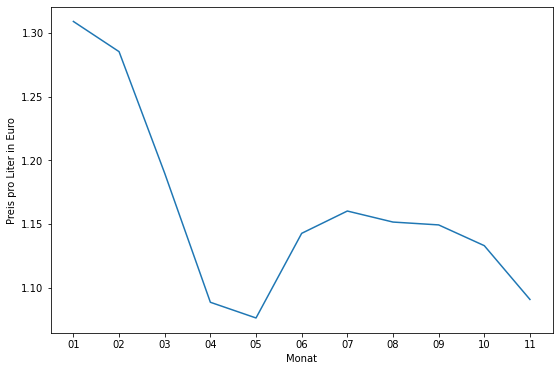

In [32]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE10, pricesE10)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von E5

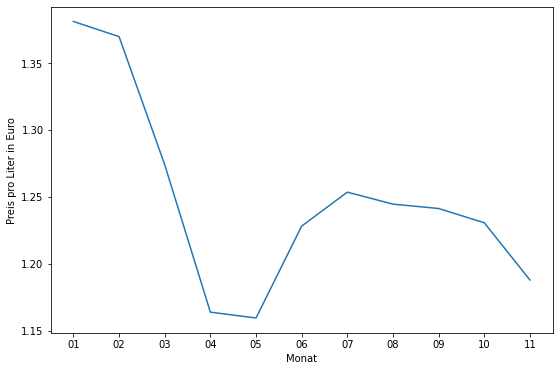

In [33]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsE5, pricesE5)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

# Monatlicher Preisverlauf von Diesel

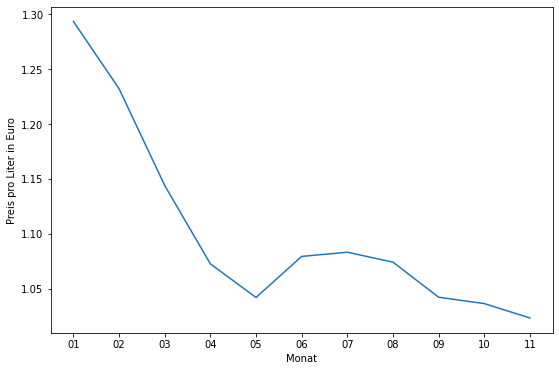

In [34]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesD)
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### E10, E5 und Diesel im Vergleich

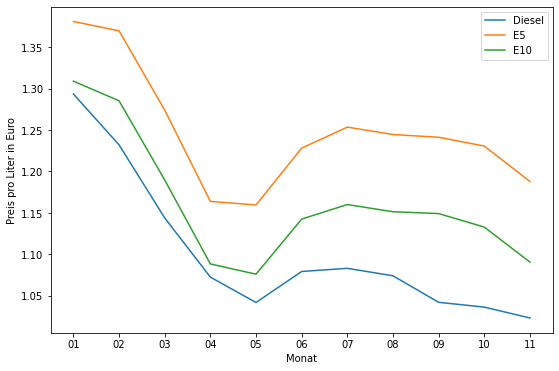

In [35]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(monthsDiesel, pricesD)
plt.plot(monthsE5, pricesE5)
plt.plot(monthsE10, pricesE10)
plt.legend(['Diesel','E5','E10'])
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

### Average price per day during year

In [36]:
def getPricesPerDayCat(l,date,cat):
    dayPrices = []
    price = 0
    count = 0
    for element in l:
        if element["_id"][0:10] == date:
            dayPrices.append(element[cat])
            price = price + (element[cat])
            count = count + 1
    return dayPrices, (price/count)


def getDates(l):
    dates = []
    for element in l:
        dates.append(element["_id"][0:10])
    a = list(set(dates))
    a.sort()
    return a

def getAvgPricePerDay(l, cat):
    dates = getDates(l)
    priceDict = []
    prices = []
    for date in dates:
        dayPrices, avgPrice = getPricesPerDayCat(l, date, cat)
        priceDict.append({"Tag":date,"Preis":avgPrice })
        prices.append(avgPrice)
    return priceDict, prices, dates

In [37]:
dieselyear, prices, dates = getAvgPricePerDay(pricesDiesel,"diesel")

## Preisverlauf von Diesel im Jahr 2020 (Jeder Tag)

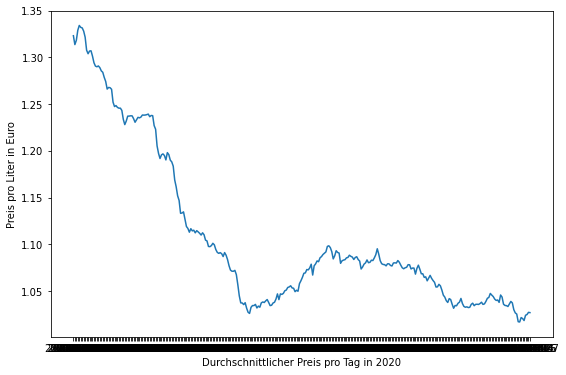

In [38]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dates, prices)
plt.xlabel('Durchschnittlicher Preis pro Tag in 2020')
plt.ylabel('Preis pro Liter in Euro')
plt.show()

## Average price during day

In [39]:
def getHours(l):
    hours = []
    for element in l:
        hours.append(element["_id"][11:13])
    a = list(set(hours))
    a.sort()
    return a

def getAvgPriceAtHour(l, date, time, cat):
    price = 0
    count = 0
    for element in l:
        if(element["_id"][0:10] == date):
            if (element["_id"][11:13] == time):
                price = price + element[cat]
                count = count + 1
    if count == 0:
        count = 1
    return (price/count)

def getAvgPriceEveryHour(l,date,cat):
    print("Tag: " + date + ", Kategorie: " +cat)
    hours = getHours(l)
    priceDict = []
    prices = []
    for hour in hours:
        hourPrice = getAvgPriceAtHour(l, date, hour, cat)
        priceDict.append({"Stunde": hour, "Preis": hourPrice})
        prices.append(hourPrice)
       # print(hour+":00 - "+hour+":59 Uhr | Durchschnittspreis: " + str(hourPrice))
    return priceDict, prices, hours

def getAvgPriceEveryHourTotal(l,cat):
    print("Durchschnittlicher Tagesverlauf in 2020, Kategorie: " + cat)
    dates = getDates(l)
    pricesTotal = []
    count = 0
    for i in range(0,24):
        pricesTotal.append(0)
    for date in dates:
        priceDict, dayPrices, dayHours = getAvgPriceEveryHour(l,date,cat)
        i = 0
        while i < len(dayPrices):
            if count > 0:
                if dayPrices[i] != 0:
                    pricesTotal[i] = (pricesTotal[i] + dayPrices[i])/2
            else:
                pricesTotal[i] = (pricesTotal[i] + dayPrices[i])
            i = i + 1
            count = count + 1
    return pricesTotal

In [40]:
pricesHourTotal = getAvgPriceEveryHourTotal(pricesEClass, "e5")

Durchschnittlicher Tagesverlauf in 2020, Kategorie: e5
Tag: 2020-01-01, Kategorie: e5
Tag: 2020-01-02, Kategorie: e5
Tag: 2020-01-03, Kategorie: e5
Tag: 2020-01-04, Kategorie: e5
Tag: 2020-01-05, Kategorie: e5
Tag: 2020-01-06, Kategorie: e5
Tag: 2020-01-07, Kategorie: e5
Tag: 2020-01-08, Kategorie: e5
Tag: 2020-01-09, Kategorie: e5
Tag: 2020-01-10, Kategorie: e5
Tag: 2020-01-11, Kategorie: e5
Tag: 2020-01-12, Kategorie: e5
Tag: 2020-01-13, Kategorie: e5
Tag: 2020-01-14, Kategorie: e5
Tag: 2020-01-15, Kategorie: e5
Tag: 2020-01-16, Kategorie: e5
Tag: 2020-01-17, Kategorie: e5
Tag: 2020-01-18, Kategorie: e5
Tag: 2020-01-19, Kategorie: e5
Tag: 2020-01-20, Kategorie: e5
Tag: 2020-01-21, Kategorie: e5
Tag: 2020-01-22, Kategorie: e5
Tag: 2020-01-23, Kategorie: e5
Tag: 2020-01-24, Kategorie: e5
Tag: 2020-01-25, Kategorie: e5
Tag: 2020-01-26, Kategorie: e5
Tag: 2020-01-27, Kategorie: e5
Tag: 2020-01-28, Kategorie: e5
Tag: 2020-01-29, Kategorie: e5
Tag: 2020-01-30, Kategorie: e5
Tag: 2020-01-31

Tag: 2020-09-20, Kategorie: e5
Tag: 2020-09-21, Kategorie: e5
Tag: 2020-09-22, Kategorie: e5
Tag: 2020-09-23, Kategorie: e5
Tag: 2020-09-24, Kategorie: e5
Tag: 2020-09-25, Kategorie: e5
Tag: 2020-09-26, Kategorie: e5
Tag: 2020-09-27, Kategorie: e5
Tag: 2020-09-28, Kategorie: e5
Tag: 2020-09-29, Kategorie: e5
Tag: 2020-09-30, Kategorie: e5
Tag: 2020-10-01, Kategorie: e5
Tag: 2020-10-02, Kategorie: e5
Tag: 2020-10-03, Kategorie: e5
Tag: 2020-10-04, Kategorie: e5
Tag: 2020-10-05, Kategorie: e5
Tag: 2020-10-06, Kategorie: e5
Tag: 2020-10-07, Kategorie: e5
Tag: 2020-10-08, Kategorie: e5
Tag: 2020-10-09, Kategorie: e5
Tag: 2020-10-10, Kategorie: e5
Tag: 2020-10-11, Kategorie: e5
Tag: 2020-10-12, Kategorie: e5
Tag: 2020-10-13, Kategorie: e5
Tag: 2020-10-14, Kategorie: e5
Tag: 2020-10-15, Kategorie: e5
Tag: 2020-10-16, Kategorie: e5
Tag: 2020-10-17, Kategorie: e5
Tag: 2020-10-18, Kategorie: e5
Tag: 2020-10-19, Kategorie: e5
Tag: 2020-10-20, Kategorie: e5
Tag: 2020-10-21, Kategorie: e5
Tag: 202

# Tagesverlauf von E5 in 2020

In [41]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dayHoursDiesel, pricesHourTotal)
plt.xlabel('Uhrzeit')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Tagesverlauf von E5 im Jahr 2020")
plt.show()

NameError: name 'dayHoursDiesel' is not defined

<Figure size 648x432 with 0 Axes>

# Tagesverlauf von Diesel an einem bestimmten Tag 
## 28.08.2020

In [ ]:
dayDictDiesel, dayPricesDiesel, dayHoursDiesel = getAvgPriceEveryHour(pricesDiesel, "2020-08-28", "diesel")

In [ ]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1.5, forward=True)
plt.plot(dayHoursDiesel, dayPricesDiesel)
plt.xlabel('Uhrzeit')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Tagesverlauf von Diesel am 28.08.2020")
plt.show()

## Pricing cities

In [66]:
res = stationen.aggregate([
    { 
        "$match": 
        {
            "$or": [ { "city": "München" }, { "city": "Freiburg" }, { "city": "Mannheim" },{ "city": "Frankfurt"}, { "city": "Hamburg"}, { "city": "Berlin"},{ "city": "Köln"}]
        }
    }

])
cityStations = list(res)

In [57]:
def getCities(l):
    cities = []
    for element in l:
        cities.append(element["city"])
    return list(set(cities))

def splitIDforCity(l, cities):
    cityIDs = []
    for city in cities:
        for element in l:
            if element["city"] == city:
                cityIDs.append({"Stadt": city, "ID": element["uuid"]})
    return cityIDs

def getIDsByCity(ids, city):
    cityIDs = []
    for id in ids:
        if id['Stadt'] == city:
            cityIDs.append({"station_uuid": id['ID']})
    return cityIDs

def getCheapestID(ids):
    a = ids[0]['e5']
    c = 0 
    idNumber = 0
    for id in ids:
        c = c + 1
        if a > id['e5']:
            a = id['e5']
            idNumber = c
    return ids[idNumber-1]

def getCheapestStationName(ids):
    station = getCheapestID(ids)
    
    res = stationen.aggregate([
    { 
        "$match": 
        {
             "uuid": station['_id'] 
        }
    }

    ])
    station = list(res)
    print('Adresse: ',station[0]['name'],' Name: ',station[0]['brand'] )

In [14]:
ids = splitIDforCity(cityStations, getCities(cityStations))

In [48]:
munichIds = getIDsByCity(ids, "München")
ffIds = getIDsByCity(ids, "Frankfurt")
hamburgIds = getIDsByCity(ids, "Hamburg")
mannheimIds = getIDsByCity(ids, "Mannheim")

In [60]:
#MongoDB Query - Avg. E5 prices for Munich - takes forever
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":munichIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Munich = list(res)

In [61]:
#MongoDB Query - Avg. E5 prices for Frankfurt - takes forever too
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":ffIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Frankfurt = list(res)

In [62]:
#MongoDB Query - Avg. E5 prices for Hamburg - takes forever too
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":hamburgIds }
        },
        {
            "$group" : {"_id": "$date" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5Hamburg = list(res)

In [ ]:
monthDictE5Munich, pricesE5Munich, monthsE5Munich = getPriceOfMonths(e5Munich, "e5")

In [ ]:
monthDictE5ff, pricesE5ff, monthsE5ff = getPriceOfMonths(e5Frankfurt, "e5")

In [ ]:
monthDictE5hh, pricesE5hh, monthsE5hh = getPriceOfMonths(e5Hamburg, "e5")

# Preisverlauf pro Monat
### Vergleich München, Frankfurt und Durchschnitt Deutschland 2020

In [ ]:
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2, forward=True)
plt.plot(monthsE5Munich, pricesE5Munich)
plt.plot(monthsE5ff, pricesE5ff)
plt.plot(monthsE5hh, pricesE5hh)
plt.plot(monthsE5, pricesE5)
plt.legend(['München','Frankfurt', 'Hamburg', 'Durchschnitt Deutschland'])
plt.xlabel('Monat')
plt.ylabel('Preis pro Liter in Euro')
plt.title("Vergleich München, Frankfurt und Durchschnitt Deutschland 2020")
plt.show()

#  Billigiste Tankstelle in Mannheim 

In [64]:
#MongoDB Query - Avg. E5 prices for each station in Mannheim
res = preise.aggregate([
    
      
        {
            "$match":   {"$or":mannheimIds }
        },
        {
            "$group" : {"_id": "$station_uuid" , "e5": {"$avg": "$e5"}}
        }
        
    
])
e5MannheimStations = list(res)

In [65]:
getCheapestStationName(e5MannheimStations)

Adresse:  Mannheim, Waldstr. 172  Name:  HEM
